##Importing libraries


In [ ]:
import pandas as pd                   #data exploration
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt       #data visualization

sns.set_theme(style="darkgrid")       #setting up seaborn for graphs
%matplotlib inline

import nltk                           #libraries for text cleaning 
nltk.download('wordnet')
# nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords    #removing stopwords

from nltk import word_tokenize       #library for tokenizing

from wordcloud import WordCloud, STOPWORDS    #making wordcloud

from sklearn.feature_extraction.text import CountVectorizer     #for n-gram

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Reading dataset and displaying first 5 rows



In [ ]:
df = pd.read_csv('Dataset.csv')     #reading dataset
df.head()               #displaying first 5 rows of data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
dataset = df.drop('Unnamed: 0',axis=1)      #reducing data by droping Unnamed: 0 column

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [ ]:
dataset.describe()      #statistical details of data

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
dataset.describe(include='O')       #text, categorical count

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,General,Tops,Dresses
freq,136,3,13850,10468,6319


In [ ]:
dataset.nunique()         #unique values

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [ ]:
dataset.isnull().sum()        #null value count

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
dataset = dataset.dropna()
dataset.shape             #rows n columns in dataset

(19662, 10)

##Creating saperate data frames for categorical and numerical columns

---



In [ ]:
df_numerical = dataset.select_dtypes(include=['int64'])
df_categorical = dataset.select_dtypes(include=['object'])
df_cat = dataset[['Division Name', 'Department Name','Class Name']]
print("Numerical col: ", df_numerical.columns)
print()
print("Object col: ", df_cat.columns)

Numerical col:  Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count'],
      dtype='object')

Object col:  Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')


##Correlation heatmap representing correlation between different variables

Text(0.5, 1.0, 'Heatmap for all Data')

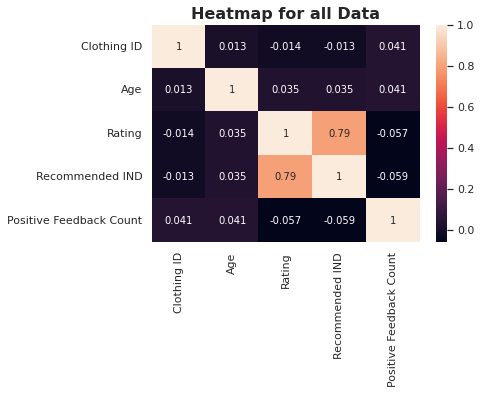

In [ ]:
sns.heatmap(dataset.corr(), annot=True)           #correlation matrice using heatmap
plt.title('Heatmap for all Data', fontsize = 16, fontweight = 'bold')

##Pairwise graphical representation of features

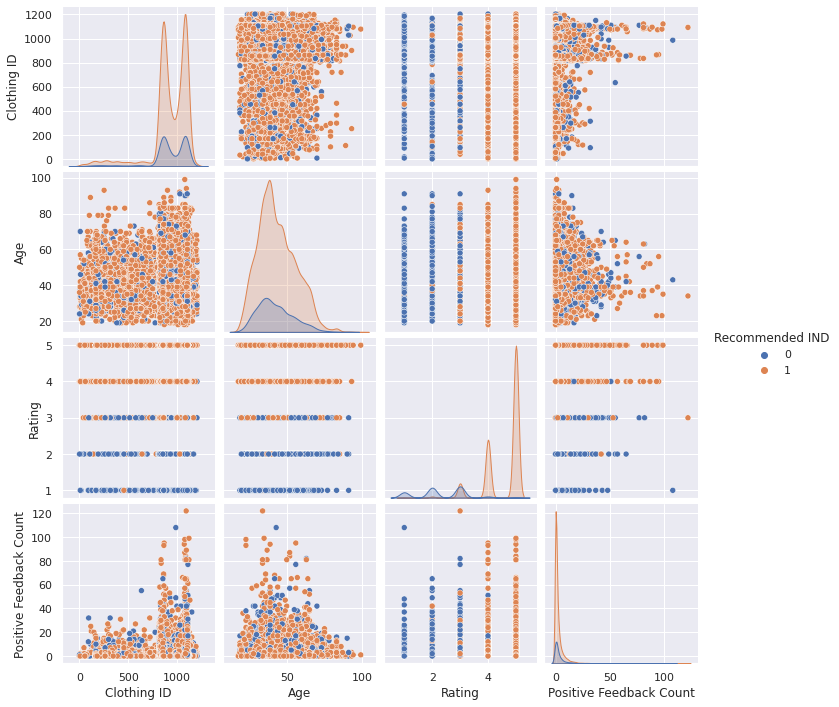

In [ ]:
sns.pairplot(dataset, hue='Recommended IND')        #pairplots to observe relationship b/w variables for follow up analysis

###Pie chart showing recommended v/s not recommended items

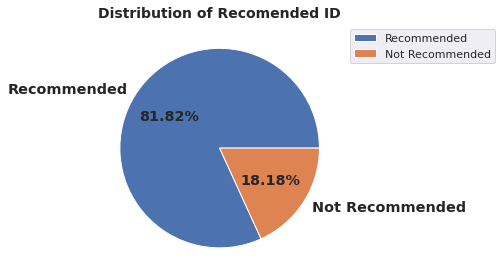

In [ ]:
dataset.loc[dataset['Recommended IND'] == 0, 'Recommended IND'] = "Not Recommended" 
dataset.loc[dataset['Recommended IND'] == 1, 'Recommended IND'] = "Recommended"
plt.figure(figsize = (6,4))                           #pie chart to observe recomended
x = dataset['Recommended IND'].value_counts()         #n non recomended data
labels = 'Recommended','Not Recommended'
plt.pie(x = x,  labels = labels,
        autopct = '%.2f%%', 
        textprops = {'size' : 'x-large',
                   'fontweight' : 'bold'})
plt.title('Distribution of Recomended ID', fontsize = 14, fontweight = 'bold')
plt.legend(labels, loc="upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

###Histograms showing the target audience and rating given by user

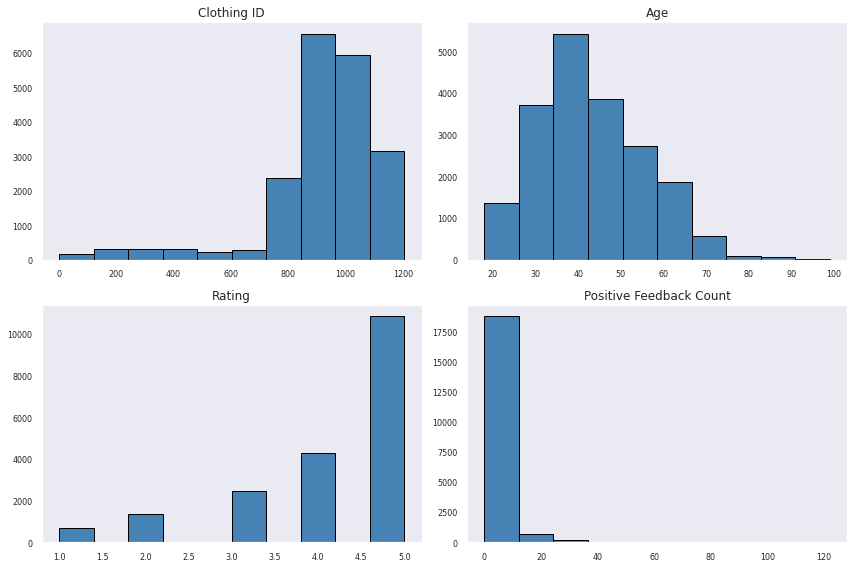

In [ ]:
dataset.hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)        #features of data as histogram for analysis
plt.tight_layout(rect=(0, 0, 2, 2))

###Sales count by division and clothing type, indicating the trend among customers 

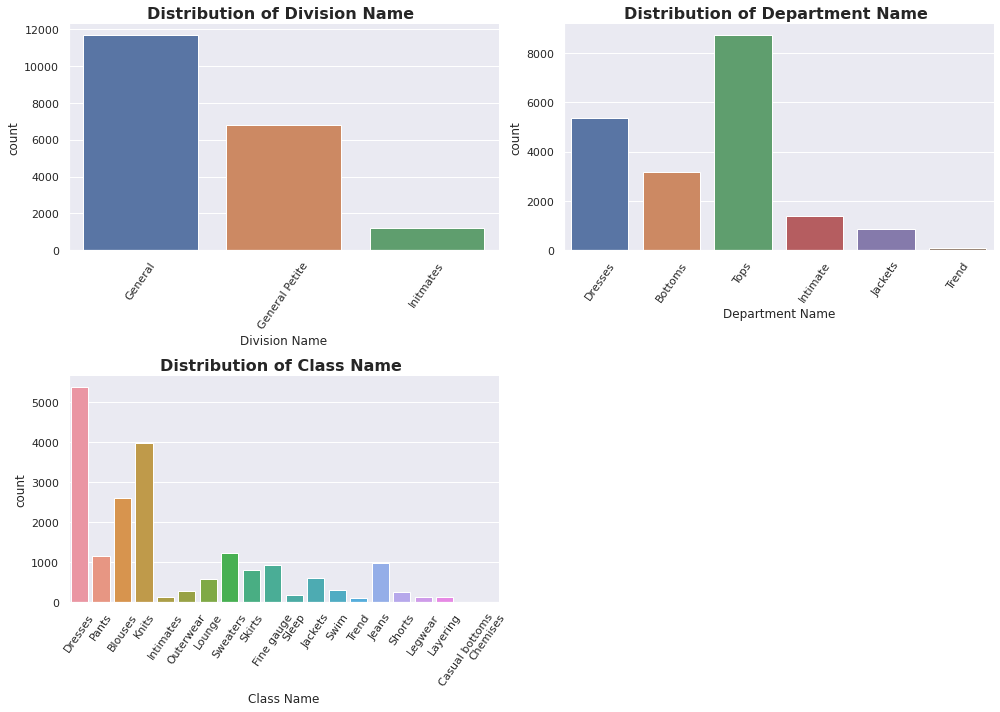

In [ ]:
plt.figure(figsize=[14,10])
n=1
for x in df_cat:
    plt.subplot(2,2,n)
    sns.countplot(x=dataset[x],data=dataset)            #product category/sub category wise distribution
    sns.despine()
    plt.title("Distribution of {} ".format(x), fontsize=16, fontweight='bold')
    plt.xticks(rotation=55)
    n=n+1
plt.tight_layout()
plt.show()

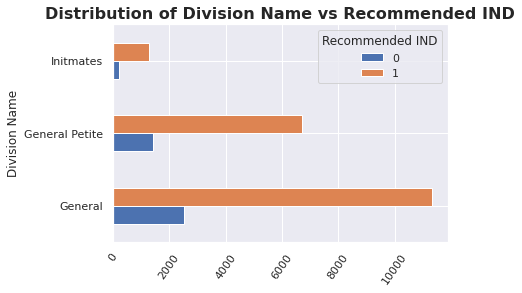

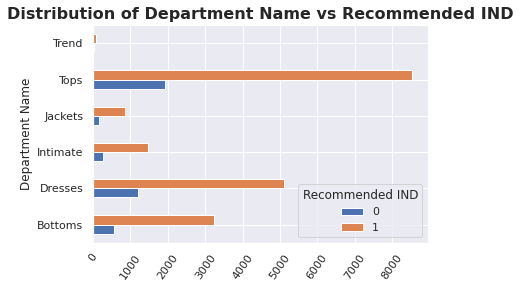

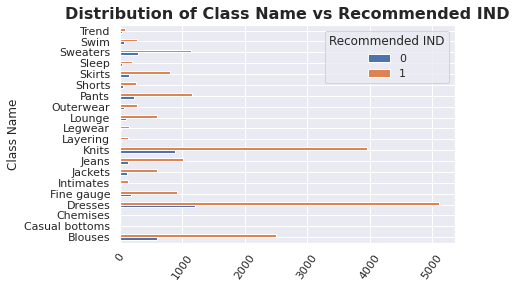

In [ ]:
for x in df_cat:
    y = pd.crosstab(df[x],df['Recommended IND'])
    y.div(y.sum(1).astype(float), axis=0)         #displaying most recommended clothing department/clothing
    y.plot(kind='barh', stacked=False)
    plt.title("Distribution of {} vs Recommended IND".format(x), fontsize=16, fontweight='bold')
    plt.xticks(rotation=55)

In [ ]:
pd.set_option('max_colwidth', 500)
dataset[['Title','Review Text']].head()

,Title,Review Text
2,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ..."
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
5,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress."
6,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops."


###Function for cleaning the text

In [ ]:
def clean_text(text):
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))       #make lower case
    text = text.apply(lambda x: "".join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))         #remove special characters
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))        #remove white spaces
    text = text.str.replace('[^\w\s]', '')        #remove punctuation
    text = text.str.replace('\d+', '')            #remove no.
    text = text.astype(str)
    return text

dataset['Filtered Review Text'] = clean_text(dataset['Review Text'])      #applying function to clean text
dataset['Filtered Review Text'].head(2)

2    i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c
3                                                                                                                                                                                                                                                                                                                                                                                       i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments
Name: Filtered R

In [ ]:
stop = stopwords.words('english')     #removing stop words
dataset['Filtered Review Text'] = dataset['Filtered Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataset['Filtered Review Text'][:2]

2    high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c
3                                                                                                                                                                                                                          love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
Name: Filtered Review Text, dtype: object

In [ ]:
def cloud(text,stopwords=stopwords):                    #wordcloud func
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    fig = plt.figure(dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    # plt.title(label= 'WordCloud',fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()

###Creating word cloud

Most Frequent Words in Low Review Text for Class Name


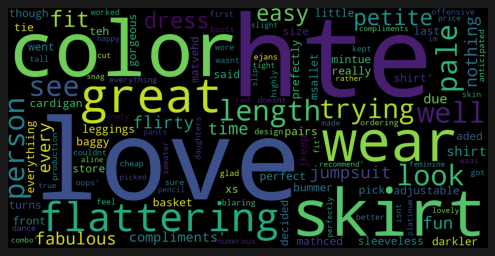

In [ ]:
print('Most Frequent Words in Low Review Text for Class Name')
temp = dataset['Filtered Review Text'][dataset.Rating.astype(int) > 3]
new_stop = set(STOPWORDS)       #updating stopwords for unique values
new_stop.update([x.lower() for x in list(dataset["Class Name"][dataset["Class Name"].notnull()].unique())])   
cloud(temp.values,  stopwords = STOPWORDS)

###N gram function

In [ ]:
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis =0) 
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

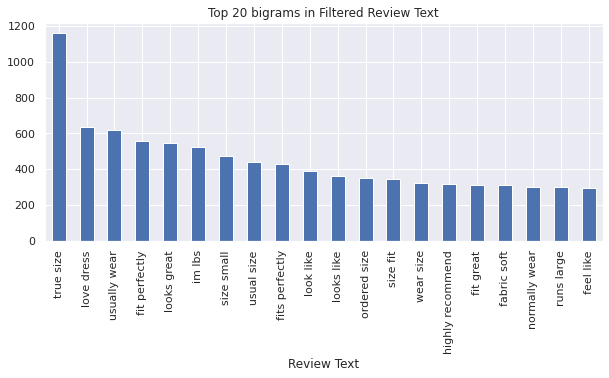

In [ ]:
common_words = top_n_ngram(dataset['Filtered Review Text'], 20,2)
dataset1 = pd.DataFrame(common_words, columns = ['Review Text' , 'count'])
plt.figure(figsize =(10,4))
dataset1.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in Filtered Review Text')